## Importing basic libraries and read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pickle

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,3.606490,11.341223,11.138343,0.069034,0.554731,6.284132,68.599014,3.792498,9.532544,407.970414,18.460552,356.753373,12.643649,22.511834
std,8.594501,23.304861,6.853661,0.253762,0.115766,0.702014,28.126273,2.104408,8.706934,168.477585,2.165755,91.222103,7.137150,9.200138
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081930,0.000000,5.190000,0.000000,0.449000,5.886000,45.050000,2.100350,4.000000,279.000000,17.400000,375.425000,6.970000,16.900000
50%,0.253870,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.450000,11.340000,21.200000
75%,3.675945,12.500000,18.100000,0.000000,0.624000,6.622000,94.050000,5.164950,24.000000,666.000000,20.200000,396.235000,16.950000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    float64
 1   ZN       507 non-null    float64
 2   INDUS    507 non-null    float64
 3   CHAS     507 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       507 non-null    float64
 6   AGE      507 non-null    float64
 7   DIS      507 non-null    float64
 8   RAD      507 non-null    int64  
 9   TAX      507 non-null    int64  
 10  PTRATIO  507 non-null    float64
 11  B        507 non-null    float64
 12  LSTAT    507 non-null    float64
 13  MEDV     507 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.6 KB


### Data VIsualization

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

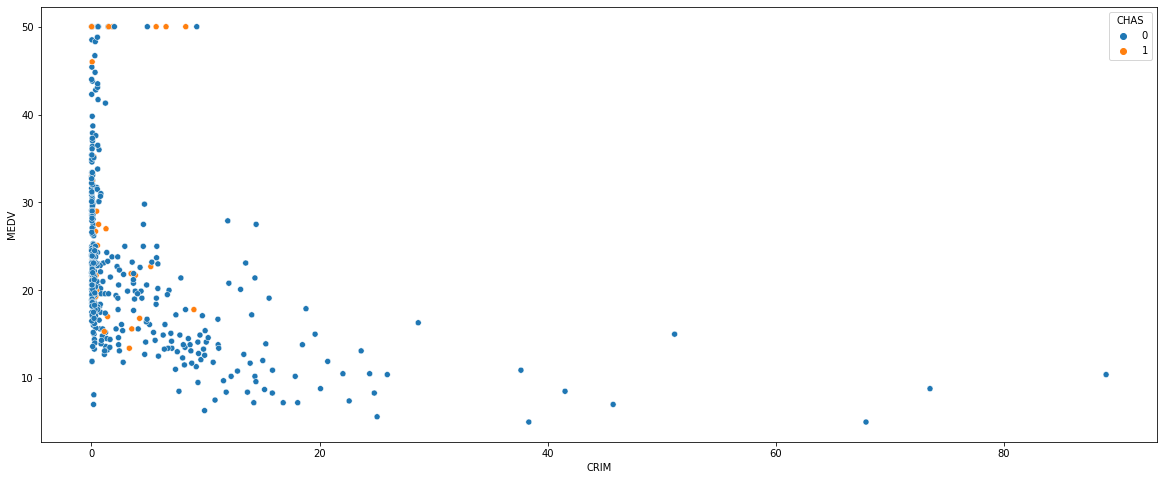

In [6]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['CRIM'],y=df['MEDV'],hue=df['CHAS'])

(array([472.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

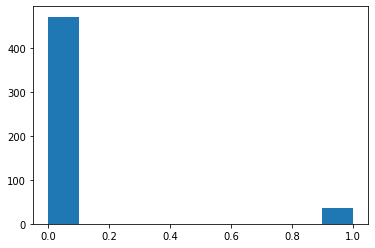

In [7]:
plt.hist(df['CHAS'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

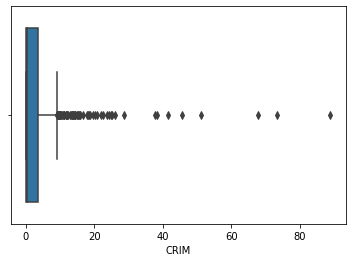

In [8]:
sns.boxplot(df['CRIM'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

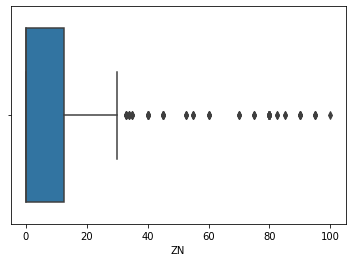

In [9]:
sns.boxplot(df['ZN'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

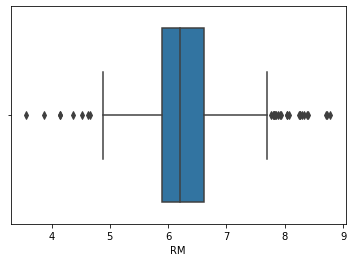

In [10]:
sns.boxplot(df['RM'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

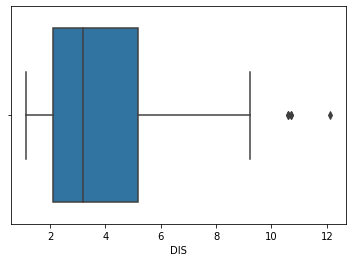

In [11]:
sns.boxplot(df['DIS'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

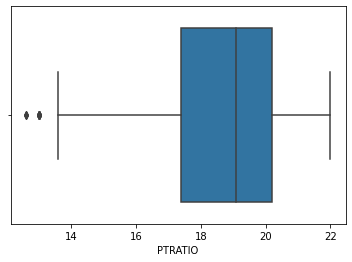

In [12]:
sns.boxplot(df['PTRATIO'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B'>

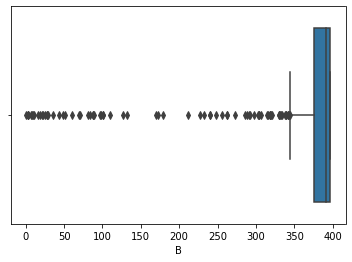

In [13]:
sns.boxplot(df['B'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

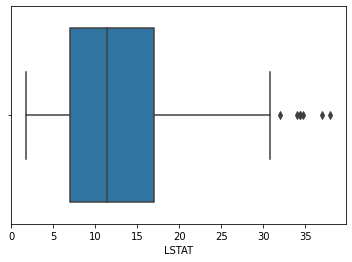

In [14]:
sns.boxplot(df['LSTAT'])

c:\users\riju dasgupta\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

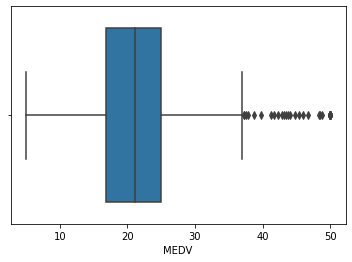

In [15]:
sns.boxplot(df['MEDV'])

## dividing total data into x and y

In [16]:
x = df.drop(columns='MEDV')

In [17]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88


In [18]:
y = df['MEDV']

In [19]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
502    20.6
503    23.9
504    22.0
505    11.9
506    11.9
Name: MEDV, Length: 507, dtype: float64

## Train-Test splitting using sklearn

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Creating a LinearRegression Object lr

In [21]:
lr = LinearRegression()

In [22]:
# lr.fit(x_train,y_train)

In [23]:
# y_pred = lr.predict(x_test)

In [24]:
# r2_score(y_test,y_pred)

### Creating a Polynomial Regression Object poly

In [25]:

poly = PolynomialFeatures(degree=2)

In [26]:
# x_train_poly = poly.fit_transform(x_train)
# x_test_poly = poly.fit_transform(x_test)

In [27]:
# lr.fit(x_train_poly,y_train)

In [28]:
# y_pred_poly = lr.predict(x_test_poly)

In [29]:
# r2_score(y_test,y_pred_poly)

# using pipeline

In [30]:
pipe = Pipeline(
    [
        ('poly',poly),
        ('lr',lr)
    ]
)

In [31]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('lr', LinearRegression())])

In [32]:
y_pred_pipe = pipe.predict(x_test)

In [33]:
r2_score(y_test,y_pred_pipe)

0.8972257524744425

### Now we are pickling the pipeline

In [34]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [35]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')